In [7]:
from collection import *
from manipulation import *
import matplotlib.pyplot as plt

In [2]:
selection_url = "https://www.ultimate-guitar.com/explore?order=hitstotal_desc&type[]=Chords"
songs = collect_songs_from_pages(selection_url)

100%|█████████████████████████████████████████████| 5/5 [00:02<00:00,  2.02it/s]


In [3]:
urls = [song["url"] for song in songs]

In [4]:
save_chord_info_list("data/chords.json", urls)

0it [00:00, ?it/s]


In [5]:
# Chord manipulation

df = pd.read_json("data/chords.json").T.reset_index()
df = df.dropna()
df["qualities"] = df["chords"].apply(get_qualities)
df["roots"] = df["chords"].apply(get_roots)
df["roots_in_C"] = df.apply(lambda row: perform_transpositions(row["roots"], row["key"], row["capo"]), axis=1)
df["root_ints"] = df["roots"].apply(notes_to_ints)
#df["transitions"] = df["root_ints"].apply(get_transitions)
df["chords_in_C"] = df.apply(concatenate_chords, axis=1)
df["prop_diatonic"] = df["chords_in_C"].apply(prop_diatonic)
df = df[df["prop_diatonic"] > 0.75]
df

,index,chords,key,capo,qualities,roots,roots_in_C,root_ints,chords_in_C,prop_diatonic
0,https://tabs.ultimate-guitar.com/tab/jeff-buck...,"[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...",Db,1,"[major, minor, major, minor, major, minor, maj...","[C, A, C, A, C, A, C, A, F, G, C, G, C, F, G, ...","[C, A, C, A, C, A, C, A, F, G, C, G, C, F, G, ...","[0, 9, 0, 9, 0, 9, 0, 9, 5, 7, 0, 7, 0, 5, 7, ...","[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...",0.964789
1,https://tabs.ultimate-guitar.com/tab/ed-sheera...,"[G, G, Em, C, D, G, Em, C, D, G, Em, C, G, D, ...",Ab,1,"[major, major, minor, major, major, major, min...","[G, G, E, C, D, G, E, C, D, G, E, C, G, D, G, ...","[C, C, A, F, G, C, A, F, G, C, A, F, C, G, C, ...","[7, 7, 4, 0, 2, 7, 4, 0, 2, 7, 4, 0, 7, 2, 7, ...","[C, C, Am, F, G, C, Am, F, G, C, Am, F, C, G, ...",1.000000
2,https://tabs.ultimate-guitar.com/tab/elvis-pre...,"[C, G, Am, F, C, G, C, C, Em, Am, F, C, G, F, ...",D,2,"[major, major, minor, major, major, major, maj...","[C, G, A, F, C, G, C, C, E, A, F, C, G, F, G, ...","[C, G, A, F, C, G, C, C, E, A, F, C, G, F, G, ...","[0, 7, 9, 5, 0, 7, 0, 0, 4, 9, 5, 0, 7, 5, 7, ...","[C, G, Am, F, C, G, C, C, Em, Am, F, C, G, F, ...",0.844660
3,https://tabs.ultimate-guitar.com/tab/passenger...,"[G, F, G, Am, G, F, G, Am, G, F, C, G, Am, F, ...",Em,7,"[major, major, major, minor, major, major, maj...","[G, F, G, A, G, F, G, A, G, F, C, G, A, F, C, ...","[G, F, G, A, G, F, G, A, G, F, C, G, A, F, C, ...","[7, 5, 7, 9, 7, 5, 7, 9, 7, 5, 0, 7, 9, 5, 0, ...","[G, F, G, Am, G, F, G, Am, G, F, C, G, Am, F, ...",1.000000
5,https://tabs.ultimate-guitar.com/tab/jason-mra...,"[G, D, Em, C, G, D, Em, C, G, D, Em, C, G, D, ...",B,4,"[major, major, minor, major, major, major, min...","[G, D, E, C, G, D, E, C, G, D, E, C, G, D, E, ...","[C, G, A, F, C, G, A, F, C, G, A, F, C, G, A, ...","[7, 2, 4, 0, 7, 2, 4, 0, 7, 2, 4, 0, 7, 2, 4, ...","[C, G, Am, F, C, G, Am, F, C, G, Am, F, C, G, ...",0.950617
...,...,...,...,...,...,...,...,...,...,...
243,https://tabs.ultimate-guitar.com/tab/misc-trad...,"[C, G7, G7, C, C, F, C, G7, C]",Db,1,"[major, major, major, major, major, major, maj...","[C, G, G, C, C, F, C, G, C]","[C, G, G, C, C, F, C, G, C]","[0, 7, 7, 0, 0, 5, 0, 7, 0]","[C, G, G, C, C, F, C, G, C]",1.000000
244,https://tabs.ultimate-guitar.com/tab/the-calli...,"[C, G, Am, F, C, G, Am, F, C, G, Am, F, C, G, ...",D,2,"[major, major, minor, major, major, major, min...","[C, G, A, F, C, G, A, F, C, G, A, F, C, G, A, ...","[C, G, A, F, C, G, A, F, C, G, A, F, C, G, A, ...","[0, 7, 9, 5, 0, 7, 9, 5, 0, 7, 9, 5, 0, 7, 9, ...","[C, G, Am, F, C, G, Am, F, C, G, Am, F, C, G, ...",0.989691
246,https://tabs.ultimate-guitar.com/tab/radiohead...,"[D, Gm, D, Gmaj7/B, Em, A, Asus4, D, Gm, D, Gm...",F,3,"[major, minor, major, minor, minor, major, maj...","[D, G, D, G, E, A, A, D, G, D, G, E, A, A, D, ...","[C, F, C, F, D, G, G, C, F, C, F, D, G, G, C, ...","[2, 7, 2, 7, 4, 9, 9, 2, 7, 2, 7, 4, 9, 9, 2, ...","[C, Fm, C, Fm, Dm, G, G, C, Fm, C, Fm, Dm, G, ...",0.757576
248,https://tabs.ultimate-guitar.com/tab/red-hot-c...,"[D, F#, E, B, C#m, G#m, A, E, B, C#m, A, E, B,...",E,0,"[major, major, major, major, minor, minor, maj...","[D, F#, E, B, C#, G#, A, E, B, C#, A, E, B, C#...","[Bb, D, C, G, A, E, F, C, G, A, F, C, G, A, E,...","[2, 6, 4, 11, 1, 8, 9, 4, 11, 1, 9, 4, 11, 1, ...","[Bb, D, C, G, Am, Em, F, C, G, Am, F, C, G, Am...",0.779528


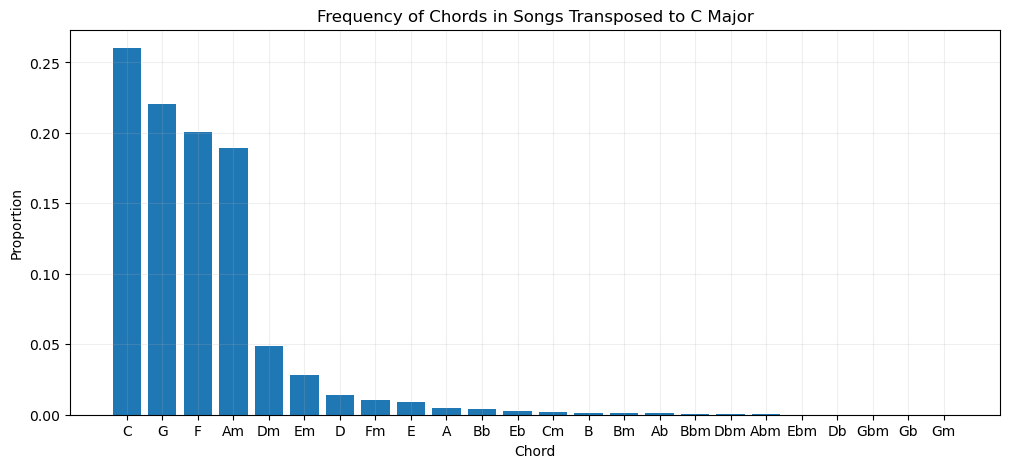

In [8]:
# Visual

all_chords = pd.Series([chord for chords in df['chords_in_C'] for chord in chords])
chord_props = all_chords.value_counts() / len(all_chords)

fig = plt.figure(figsize=(12, 5))
plt.bar(x = chord_props.index, height = chord_props.values)
plt.title("Frequency of Chords in Songs Transposed to C Major")
plt.ylabel("Proportion")
plt.xlabel("Chord")
plt.grid(alpha=0.2)
plt.show()